## NN regression

Simple NN example doing linear regression for the sake of intuition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
## Defining some data

observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-5,5,(observations,1))

## y = 2x-3x+5
generated_target=2*xs-3*zs+5+noise

In [34]:
np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')

In [35]:
np.shape(generated_inputs)

(1000, 2)

In [36]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=0)

In [37]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]


In [38]:
weights

array([[ 1.9145153],
       [-2.9548538]], dtype=float32)

In [39]:
out=training_data['targets'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.028354112161992025

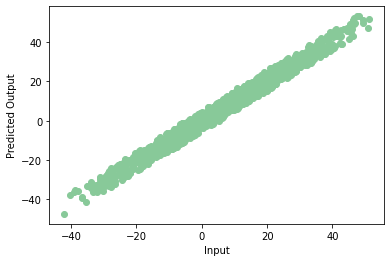

In [40]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()

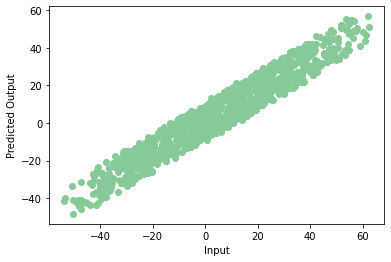

In [20]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()